# **Manejo de DataSet de Melbourne**

1. [Obtención de datos](#obtención-de-datos)
    1. [Windows](#windows)
        1. [Copiarlo al Drive](#copiarlo-al-drive)

    2. [Linux](#linux)
        1. [Copiarlo al Drive](#copiarlo-al-drive)

2. [Lectura de datos y análisis](#lectura-de-datos-y-análisis)

3. [Limpieza de datos](#limpieza-de-datos)
    1. [Tratamiento de Nulos](#tratamiento-de-nulos)

4. [Experimentación con columnas](#experimentación-con-columnas)

5. [Preparación de datos](#preparación-de-datos)
    1. [Outliers](#outliers)
    
    2. [OrdinalEncoder](#ordinalencoder)
    
    3. [División de datos](#división-de-datos)

6. [Definición de los modelos](#definición-de-los-modelos)
    1. [Modelo Base](#modelo-base)

    2. [Modelo XGBoost Hyperboost](#modelo-xgboost-hyperboost)

# **Obtención de datos**

In [ ]:
import pathlib


path=str(pathlib.Path().resolve())+"/"

## **WINDOWS**

#Subir el json (descargarlo a local de kaggle con “general nueva api”, subirlo con files.upload y pasarlo a la carpeta .kaggle

!pip install -q kaggle


!mkdir %USERPROFILE%/.kaggle
!copy path\\kaggle.json %USERPROFILE%\\.kaggle
#!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list


#Trae el dataset de kaggle
!kaggle datasets download "anthonypino/melbourne-housing-market"
name_zip = "melbourne-housing-market" + ".zip"
!tar -xf "melbourne-housing-market.zip"


### Copiarlo al drive
!del path + "MELBOURNE_HOUSE_PRICES_LESS.csv"
!del path + "melbourne-housing-market.zip"
#!copy path+'Melbourne_housing_FULL.csv' path+'Files\\Melbourne_housing_FULL.csv'
#!del path + "Melbourne_housing_FULL.csv"


## **LINUX**

!pip install -q kaggle


!mkdir %USER%/.kaggle
!cp path\\kaggle.json %USER%\\.kaggle
#!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

!kaggle datasets download "anthonypino/melbourne-housing-market"
name_zip = "melbourne-housing-market" + ".zip"
!tar -xf "melbourne-housing-market.zip"


### Copiarlo al drive
!rm path + "MELBOURNE_HOUSE_PRICES_LESS.csv"
!rm path + "melbourne-housing-market.zip"

In [ ]:
import pandas as pd

df = pd.read_csv(path+"Melbourne_housing_FULL.csv")
df

# **Lectura de datos y análisis**

Miramos los datos que tenemos y si necesitamos alguna transformación de los propios campos 

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.describe()

Le indicamos que el campo 'Date' es de tipo fecha

In [ ]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(20,15))
plt.show()

Vemos que hay Euliers En Landsize, BuildingArea,Bedroom2... y en YearBuilt por abajo por lo que tendremos que limpiar Euliers

In [ ]:
df.plot(kind="scatter", x="Longtitude", y="Lattitude",c='Price',alpha=0.1,colormap="Reds_r")

Vemos que hay una gran cantidad de casas sobre el 144.6 y 145.4 en Longitud y en Latitud desde -38.2 y -37.5

In [ ]:
df.sort_values(by='Date',axis=0)

No nos dice mucho poniendo fechas tan amplias

In [ ]:
df.plot.area('Date','Price')

In [ ]:
group = df.groupby('Date')
group=group[['Price','Rooms']]

media = group.mean()
sum = group.sum()

media.reset_index(inplace=True)
sum.reset_index(inplace=True)

Vemos la relacion del precio con la fecha en temas de media y su suma

In [ ]:
media.plot.area('Date','Price')
sum.plot.area('Date','Price')

Vemos que la media del precio bajó de forma agrupada al largo del tiempo, pero el total subió por lo que el precio total subió por que aumentó la cantidad a medida que aumentaba el tiempo, pero a menor demanda, menor es el precio por lo que bajó individualmente

In [ ]:
import scipy.stats as stats

grade = media['Price']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, color='lightgrey', density=True, bins=100)
plt.plot(x, density(x))

Vemos la evolución del precio sobre el 100%

In [ ]:
import scipy.stats as stats

grade = sum['Price']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, color='lightgrey', density=True, bins=100)
plt.plot(x, density(x))

## Ahora vamos a tratar los nulos de las columnas

In [ ]:
df.info()

In [ ]:
floats=df.drop(df.select_dtypes(include=['object']),axis=1)
floats

In [ ]:
from Clases.Matplot.HeatMap import HeatMap

corr=floats.corr()
HeatMap.heat_map(corr,corr.columns,corr.columns,corr.columns,corr.columns,cmap="YlGn",figsize=(10,10),weight="bold",textColor="red")

Le decimos que use solo los de tipo casa

In [ ]:
df=df[df['Type']=='h']

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# **Limpieza de datos**

In [ ]:
df.info()

## Tratamiento de Nulos

Eliminamos los que tengan valores nulos de precio, ya que no nos interesa que haya datos falsos en la columna que vamos a intentar predecir

In [ ]:
import numpy as np

df.dropna(subset=["Price"],inplace=True)

Ahora eliminamos las filas que tengan más de 6 nulos ya que más de la mitad de los datos de esa fila serían falsos por lo que no nos interesa

In [ ]:
df = df[df.isnull().sum(axis=1) < 6]

Recogemos las columnas que nos interesa incluyendo Floats, Ints y Objects

In [ ]:
df=df.drop(["Address","SellerG","Suburb","Type","Method","Car"],axis=1)

Dividimos las columnas que son int y float para tener los nombres

In [ ]:
num_cols = [col for col in df.columns if df[col].dtype in ['float64','int64']]
cat_cols = [col for col in df.columns if df[col].dtype not in ['float64','int64']]

In [ ]:
df

# **Experimentación con columnas**

No saqué ninguna nueva columna que pudiera tener datos interesantes

In [ ]:
import numpy as np


#df['Longtitude_x_Lattitude'] = np.sqrt(df['Longtitude']**2 + df['Lattitude']**2)/df['Distance']

#df['Rooms_and_Bedroom2_and_Bathroom'] = df['Rooms']+df['Bedroom2']+df['Bathroom']




In [ ]:
df.select_dtypes(exclude=['object']).corr()

# **Preparación de datos**

## Outliers

Eliminamos los Outliers de las columnas inferior al 4% y superior al 96% de los valores de cada columna

In [ ]:
df

In [ ]:
def remove_outliers(columns,df):
    df2=df.dropna(subset=columns)
    for j in columns:
        q1 = df2[j].quantile(0.031)
        q3 = df2[j].quantile(0.969)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(df2[j])
        for i in df[j]:
            if i > Upper_tail or i < Lower_tail:
                df[j] = df[j].replace(i, med)
    return df
df = remove_outliers([col for col in df.columns if df[col].dtype in ['float64','int64']],df)


## OrdinalEncoder

Transformamos los valores con OrdinalEncoder para que tengamos los valores como formato numérico

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
for i in cat_cols:
    df[i] = ordinal_encoder.fit_transform(df[[i]])

Borramos las columnas que eran de tipo Objeto y nos quedamos con los Booleanos

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True)

## División de datos

Dividimos los datos del DataFrame en Train y Test para estudiarlos

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size = 0.21,random_state=42)

Rellenamos los NaN de cada columna con el Simple Imputer diciendo que utilice el más frecuente (La moda)

In [ ]:
from sklearn.impute import SimpleImputer

x_train[num_cols]=SimpleImputer(strategy="most_frequent").fit_transform(x_train[num_cols])
x_test[num_cols]=SimpleImputer(strategy="most_frequent").fit_transform(x_test[num_cols])


Creamos el Y_Train y el Y_Test que utilizaremos en los modelos

In [ ]:
y_train = x_train["Price"].copy()
x_train = x_train.drop(["Price"],axis=1)

y_test = x_test["Price"].copy()
x_test = x_test.drop(["Price"],axis=1)


# **Definición de los modelos**

## Modelo Base

Definimos un mapa de modelos para tener un DataFrame y ver los mejores modelos

*Nos quedamos con el XGBoost*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge, ElasticNet, SGDRegressor,LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor


models = {
    #'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    #'LinearRegression':LinearRegression(),
    #'RandomForestRegressor':RandomForestRegressor()
}

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

model_results=[]
model_names=[]
model_cross_score=[]
model_cross_media=[]
model_cross_std=[]
for name,model in models.items():
    a = model.fit(x_train,y_train)
    predicted = a.predict(x_test)
    score = r2_score(y_test, predicted)
    model_results.append(score)
    model_names.append(name)
    model_score = cross_val_score(model, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-model_score)
    model_cross_score.append(root_lin_score)
    model_cross_media.append(root_lin_score.mean())
    model_cross_std.append(root_lin_score.std())
    
    
    df_results = pd.DataFrame([model_names,model_results,model_cross_score,model_cross_media,model_cross_std,[mean_squared_error(y_test, predicted,squared=False)]])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'SCORE',2:'RSCORE',3:'RMEDIA',4:'RDESVIACION',5:"SQUARE ERROR"}).sort_values(by='SQUARE ERROR',ascending=False)

Vemos el DataFrame de resultados donde vemos el R2_Score el RSCORE la Media...

In [ ]:
df_results

## Modelo XGBoost Hyperboost

Utilizamos *Optuna* para que pruebe parámetros y mejorar el modelo de XGBoost

*Ya se realizó anteriormente por eso se recogen los valores de la mejor prueba*

In [ ]:
#import optuna
#
#import sklearn.datasets
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score
#import xgboost as xgb
#
#
#def objective(trial):
#    
#    param = {
#        'tree_method':'hist',  # this parameter means using the GPU when training our mode
#        #'criterion' : trial.suggest_categorical("criterion", ["gini", "entropy"]),
#        #'device':'gpu',
#        'eta': trial.suggest_float('eta', 1.25, 2),
#        'max_depth': trial.suggest_int('max_depth', 6, 9),
#        'learning_rate': trial.suggest_float('learning_rate', 0.020, 0.5),
#        'n_estimators': trial.suggest_int('n_estimators', 300, 450),
#        'min_child_weight': trial.suggest_int('min_child_weight', 7, 9),
#        'gamma': trial.suggest_float('gamma', 0.5, 0.8),
#        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
#        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 0.55),
#        'reg_alpha': trial.suggest_float('reg_alpha', 0.2, 0.6),
#        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 0.6),
#    }
#
#    model = xgb.XGBRegressor(**param)
#    model.fit(x_train, y_train)
#    y_pred = model.predict(x_test)
#    return mean_squared_error(y_test, y_pred)
#
#
#study = optuna.create_study(direction="minimize")
#study.optimize(objective, n_trials=500)
#
#study.best_params




In [ ]:
#trial = study.best_trial
#print('Accuracy: {}'.format(trial.value))
#print("Best hyperparameters: {}".format(trial.params))

In [ ]:
#!conda install -y plotly
#!conda install -y nbformat

Nos daría un gráfico de mejora del modelo donde cada punto azul define cada uno de los intentos

In [ ]:
#optuna.visualization.plot_optimization_history(study)

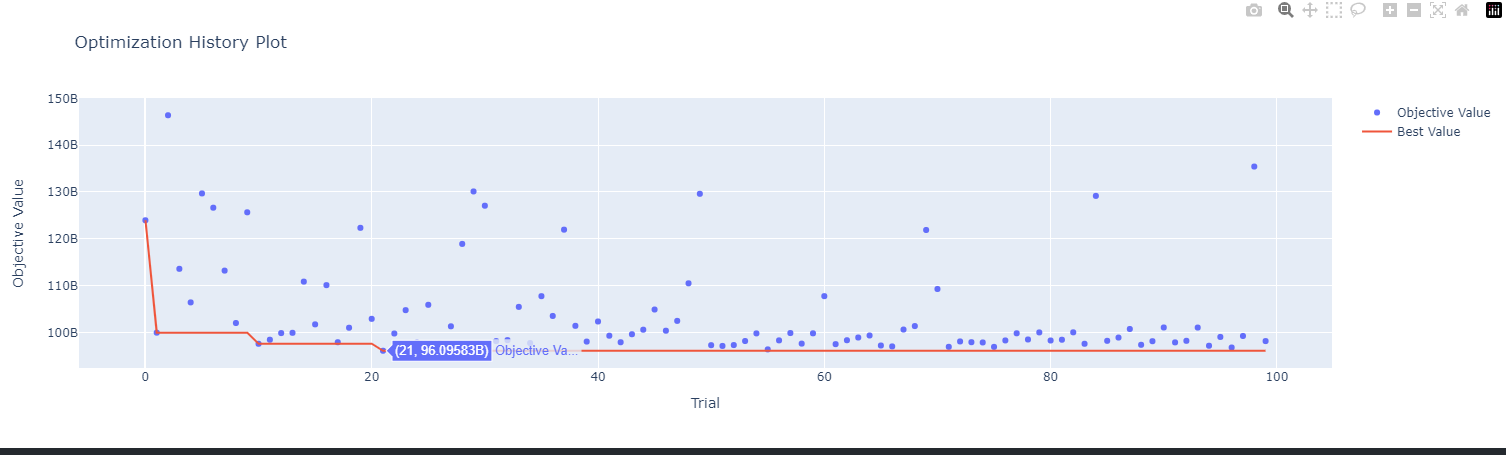

Nos devuelve cada uno de los valores utilizados, cuales estuvieron más cerca del final, por general diciendo que tuvieron mejores valores

In [ ]:
#optuna.visualization.plot_slice(study)

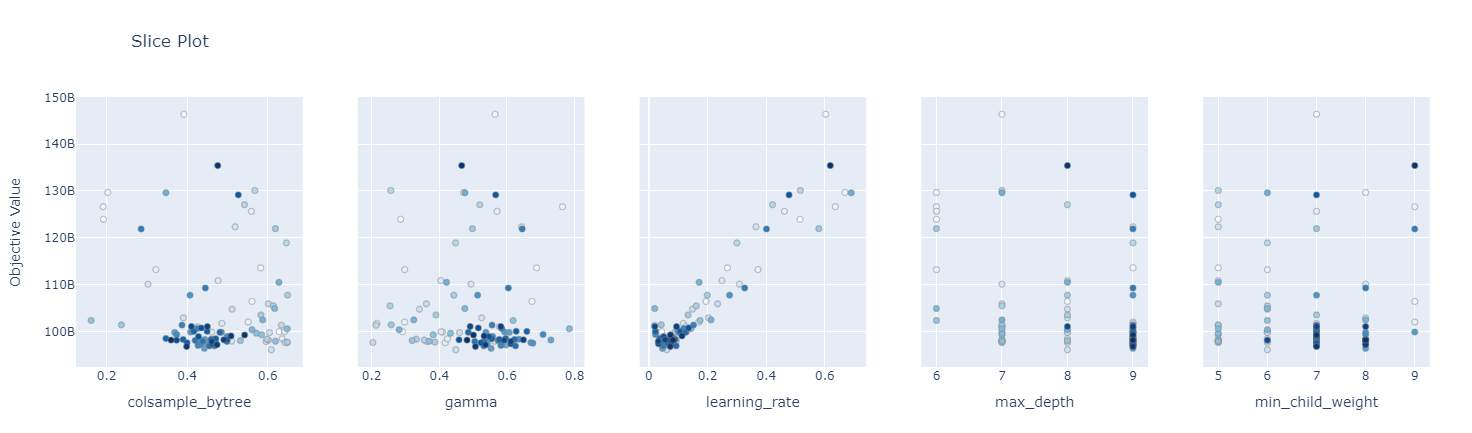
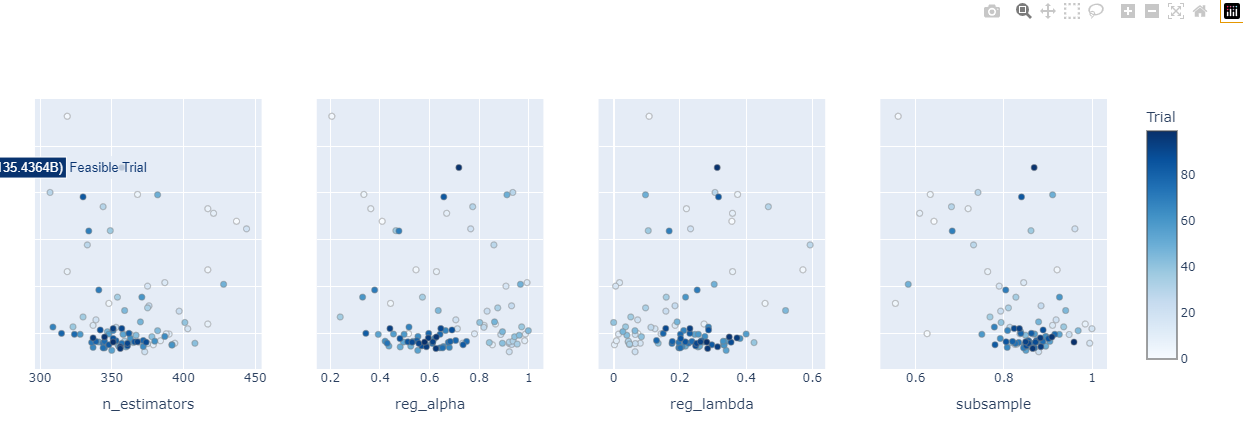

In [ ]:
#best_params = study.best_params
best_params = {'eta': 1.901502294430533,
 'max_depth': 9,
 'learning_rate': 0.027909554502118895,
 'n_estimators': 431,
 'min_child_weight': 9,
 'gamma': 0.6808953923148237,
 'subsample': 0.8561614822385545,
 'colsample_bytree': 0.4935772021791234,
 'reg_alpha': 0.46491513598351153,
 'reg_lambda': 0.32151156595397057}


Definimos el XGBRegressor con los parámetros definidos anteriormente

In [ ]:
XGBR = XGBRegressor(**best_params)
XGBR.fit(x_train, y_train)
predicted = XGBR.predict(x_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')

Y vemos unos datos de prueba para ver resultados

In [ ]:
datos_prueba =  x_test[:20]
p = XGBR.predict(datos_prueba)
print("PREDICCIONES: ",p)
y_reales = y_test[:20]
print(r2_score(y_test, predicted))
print("Reales: ", list(y_reales))

Vemos que los valores de la predicción de precio hay algunos que si se acercan bastante a sus valores reales y no están tan alejados del real